In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install -U --quiet "xgboost>=2.1.4"
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 129.6 MB/s eta 0:00:0000:01
  DEPRECATION: Buildin

# Import the necassary libraries 


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv',parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv',parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
submission = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

We drop the columns first

In [8]:
train_data = train.drop(columns=['casual', 'registered'])


In [9]:
predictor = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_data,
    time_limit=60,              # 10 minutes
    presets='best_quality'       # focus on best model
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250515_042211"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       29.79 GB / 31.35 GB (95.0%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

(_ray_fit pid=530) [1000]	valid_set's rmse: 130.657


(_ray_fit pid=529) 	Ran out of time, early stopping on iteration 1260. Best iteration is:
(_ray_fit pid=529) 	[1223]	valid_set's rmse: 132.541


(_ray_fit pid=670) [1000]	valid_set's rmse: 128.154 [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_ray_fit pid=670) 	Ran out of time, early stopping on iteration 1307. Best iteration is: [repeated 3x across cluster]
(_ray_fit pid=670) 	[1304]	valid_set's rmse: 127.665 [repeated 3x across cluster]
(_dystack pid=316) 	-133.3232	 = Validation score   (-root_mean_squared_error)
(_dystack pid=316) 	18.9s	 = Training   runtime
(_dystack pid=316) 	1.81s	 = Validation runtime
(_dystack pid=316) Fitting model: WeightedEnsemble_L2 ... Training model for up to 10.18s of the -12.95s of remaining time.
(_dystack pid=316) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=316) 	-89.8997	 = Validation score   (-root_mean_squared_error)
(_dystack pid=316) 	0.01s	 = Training   runtime
(_dystack pid=316) 	0.0s	 = Validation runtime
(_dystack pid=316) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=316) Fitting model: WeightedEnsemble_L3 ... Training model for up to 10.18s of the -13.06s of remaining time.
(_dystack pid=316) 	Ensemble Weights: {'KNeighborsDist_BAG_L1'

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  KNeighborsDist_BAG_L1  -84.135011  root_mean_squared_error       0.042325   0.020557                0.042325           0.020557            1       True          2
1    WeightedEnsemble_L3  -84.135011  root_mean_squared_error       0.043160   0.039437                0.000835           0.018880            3       True          5
2    WeightedEnsemble_L2  -84.135011  root_mean_squared_error       0.043459   0.046632                0.001134           0.026074            2       True          4
3  KNeighborsUnif_BAG_L1 -101.561182  root_mean_squared_error       0.045376   0.169176                0.045376           0.169176            1       True          1
4      LightGBMXT_BAG_L1 -131.624466  root_mean_squared_error       5.461940  26.112176                5.461

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.56118165528414,
  'KNeighborsDist_BAG_L1': -84.13501071997395,
  'LightGBMXT_BAG_L1': -131.6244662507426,
  'WeightedEnsemble_L2': -84.13501071997395,
  'WeightedEnsemble_L3': -84.13501071997395},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.1691758632659912,
  'KNeighborsDist_BAG_L1': 0.020557165145874023,
  'LightGBMXT_BAG_L1': 26.112176179885864,
  'Weig

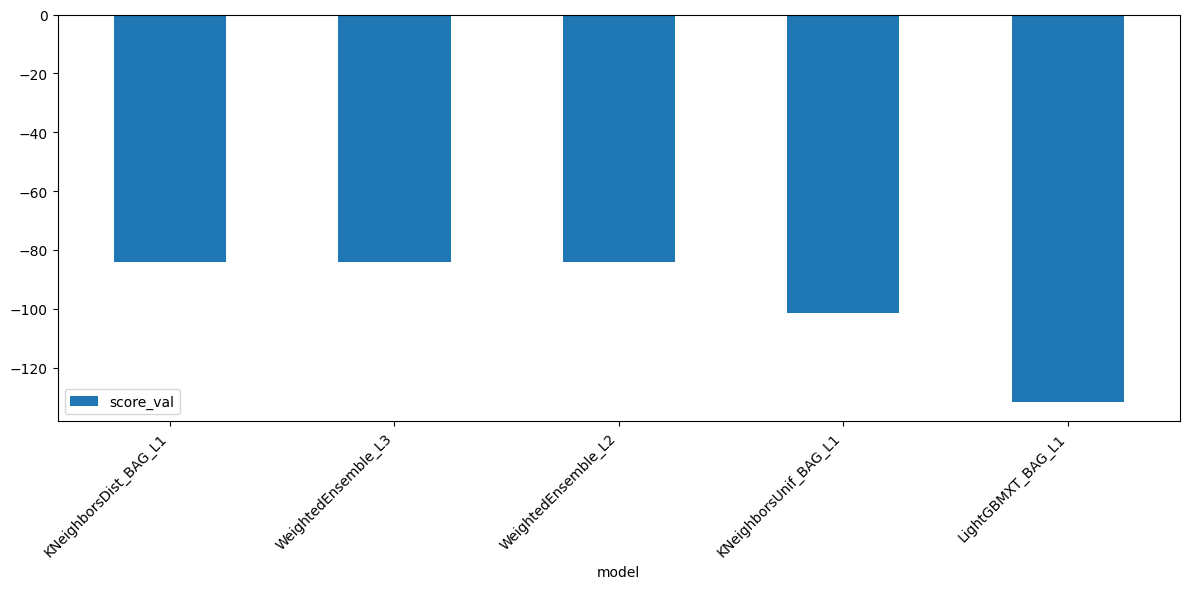

In [11]:
import matplotlib.pyplot as plt

# 1️⃣  Create a larger figure
fig, ax = plt.subplots(figsize=(12, 6))   # wider & taller than default

# 2️⃣  Draw the bar-chart
predictor.leaderboard(silent=True).plot(kind="bar",
                                        x="model",
                                        y="score_val",
                                        ax=ax)

# (optional) rotate long model names so they don’t overlap
plt.xticks(rotation=45, ha='right')

# 3️⃣  Tighten the layout *before* saving
fig.tight_layout()

# 4️⃣  Save without trimming anything
fig.savefig(
    "predictor_leaderboard.png",
    dpi=300,               # high-res for GitHub
    bbox_inches="tight",   # add margins if needed
    pad_inches=0.1
)


### Create predictions from test dataset

In [12]:
!pip install -U --quiet "xgboost>=2.1.4"

In [13]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv',
                   parse_dates=['datetime'])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [14]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv',
                   parse_dates=['datetime'])

predictions = predictor.predict(test)        # <-- use **predict**, not evaluate


In [15]:
predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468834
4    61.419930
Name: count, dtype: float32

### Checking all the negative values

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

# How many negative values do we have?
(predictions < 0).sum()

# Set them to zero
predictions = predictions.clip(lower=0)


### Set predictions to submission dataframe, save, and submit

In [17]:
# 1) Build the submission DataFrame
submission = pd.DataFrame({
    "datetime": test["datetime"],   # from the original test.csv
    "count":    predictions         # the Series you just generated
})

# 2) Save it to disk
submission.to_csv("submission.csv", index=False)

# 3) Quick peek
submission.head()


,datetime,count
0,2011-01-20 00:00:00,51.861626
1,2011-01-20 01:00:00,56.686295
2,2011-01-20 02:00:00,59.077763
3,2011-01-20 03:00:00,60.468834
4,2011-01-20 04:00:00,61.419930


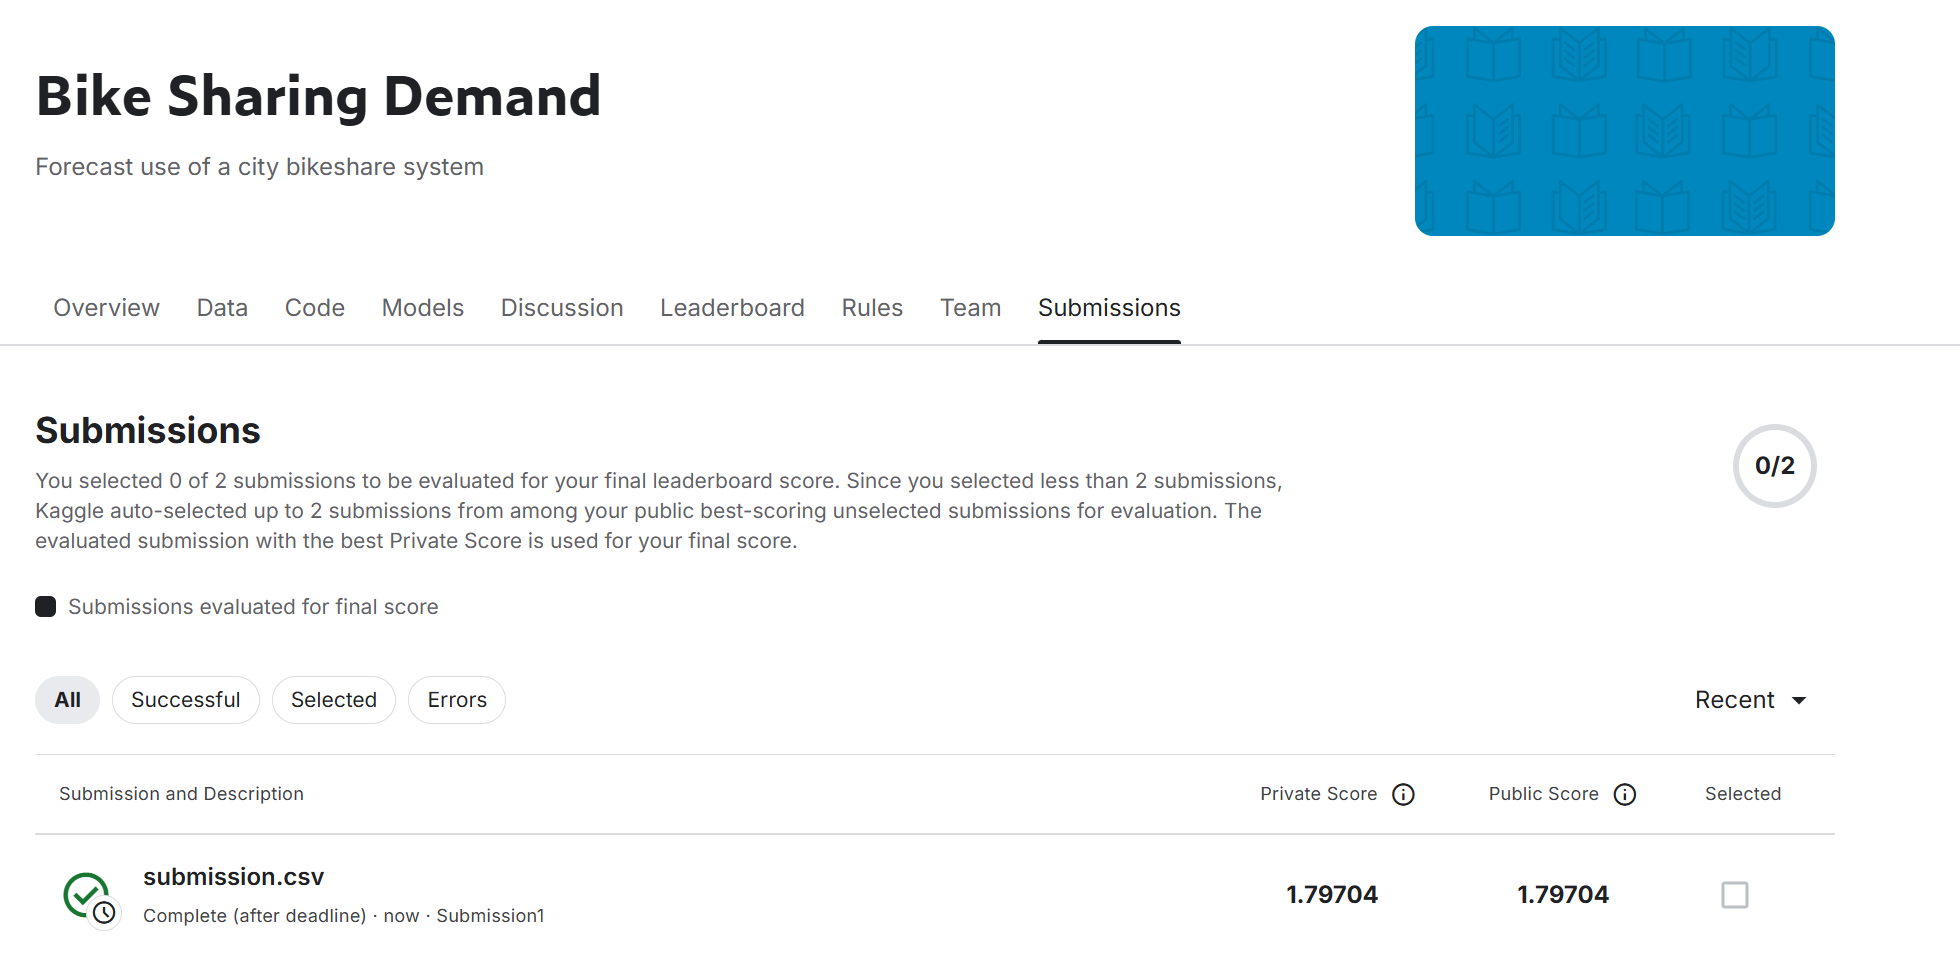

In [18]:
!pip install ace_tools

### Some feature engineering

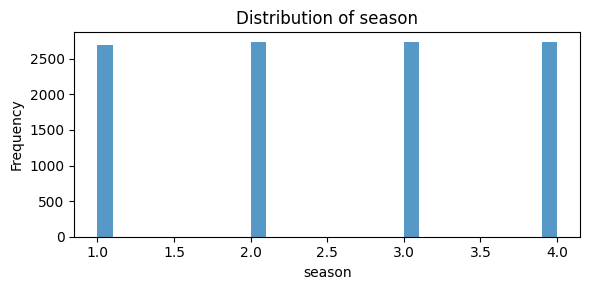

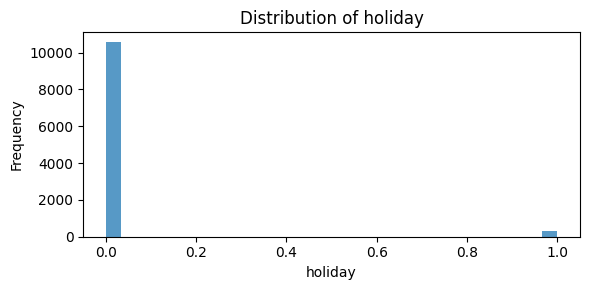

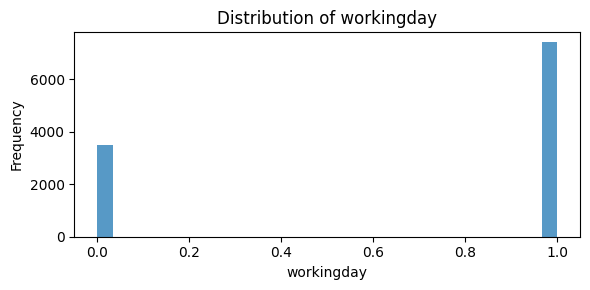

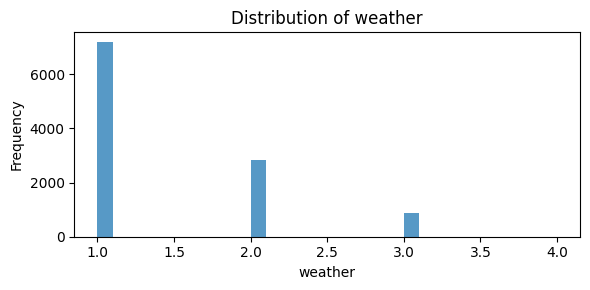

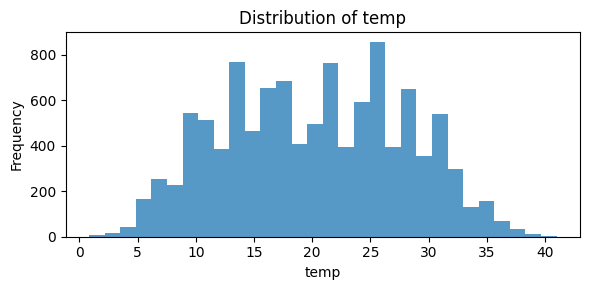

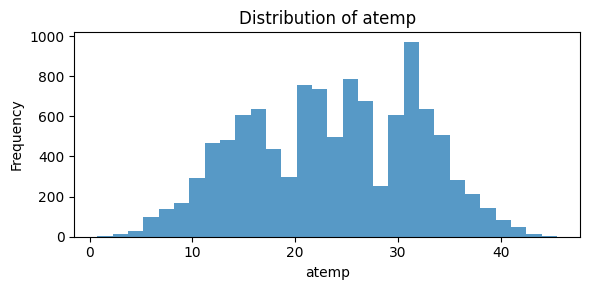

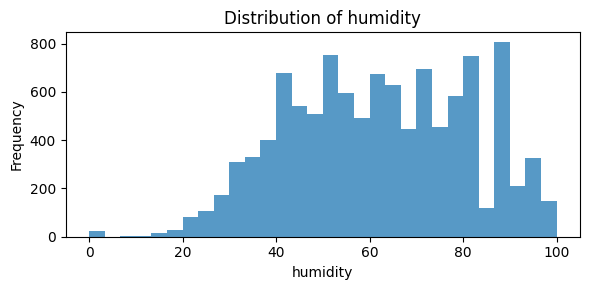

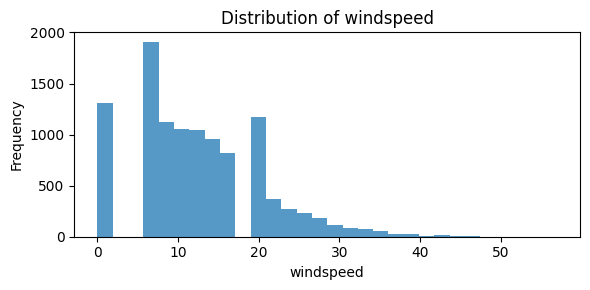

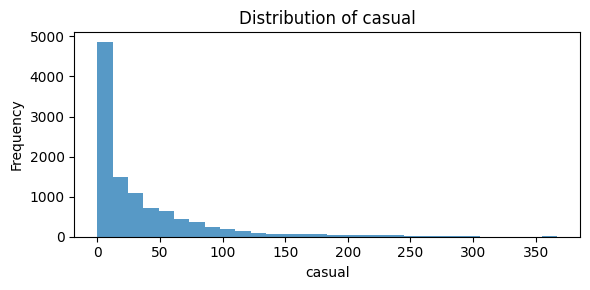

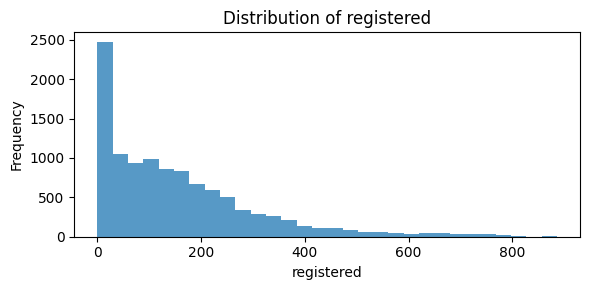

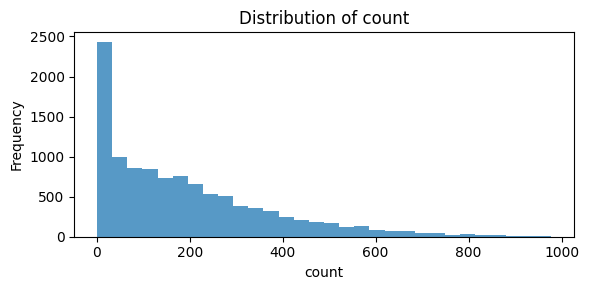

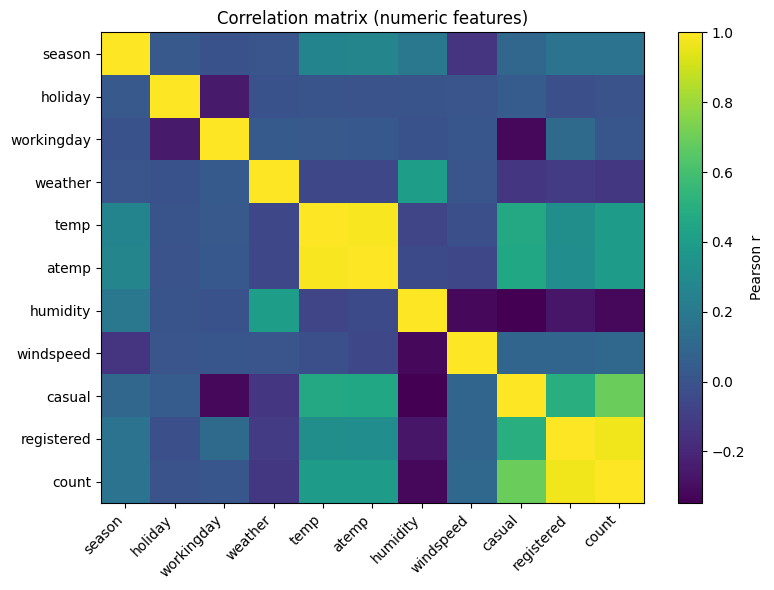

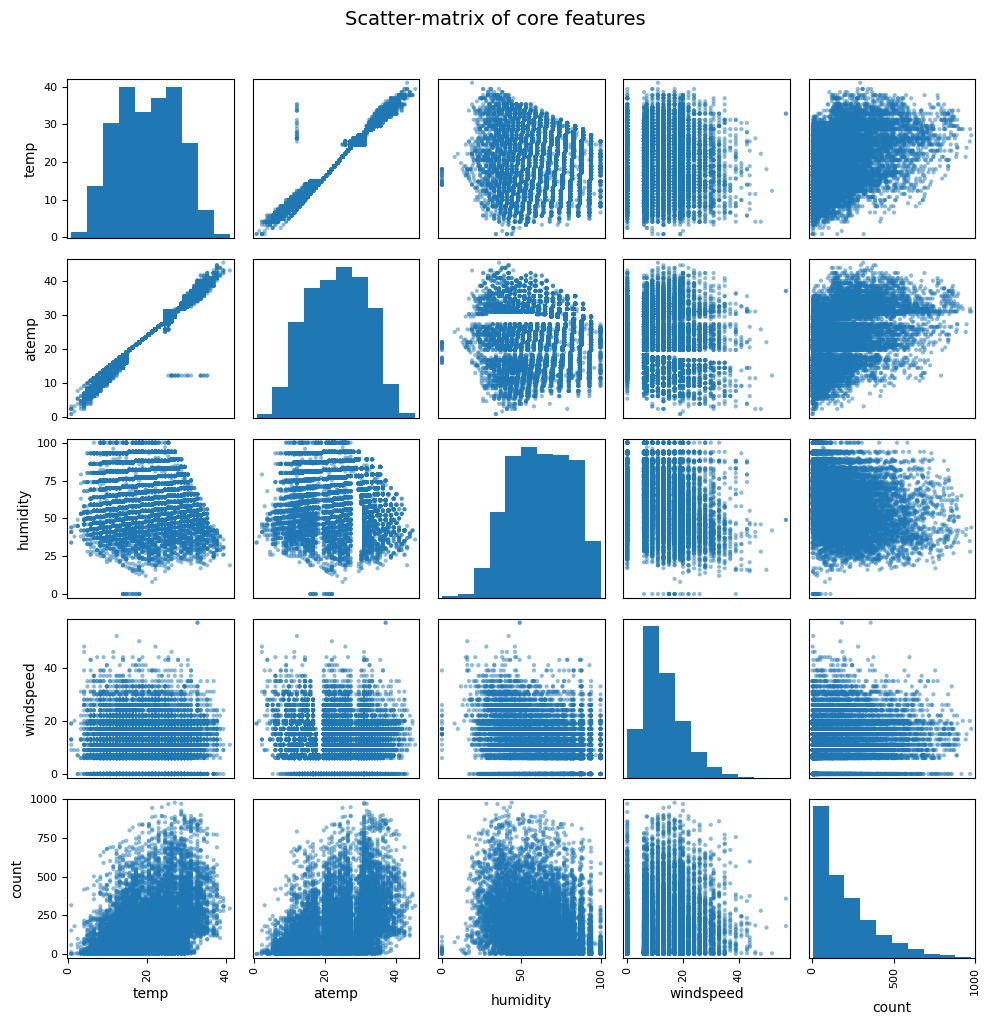

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# ──────────────────────────────────────────────
# 0.  BASIC SANITY: keep only numeric columns
# ──────────────────────────────────────────────
numeric_cols = train.select_dtypes(include='number').columns.tolist()

# ──────────────────────────────────────────────
# 1.  INDIVIDUAL HISTOGRAMS (one figure each)
# ──────────────────────────────────────────────
for col in numeric_cols:
    plt.figure(figsize=(6, 3))           # single clean figure
    train[col].plot(kind="hist", bins=30, alpha=0.75)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# ──────────────────────────────────────────────
# 2.  CORRELATION HEAT-MAP  (numeric only)
# ──────────────────────────────────────────────
plt.figure(figsize=(8, 6))
corr = train[numeric_cols].corr()
plt.imshow(corr, cmap="viridis", aspect="auto")   # default colourmap, no manual colours
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

# ──────────────────────────────────────────────
# 3.  SCATTER-MATRIX  (quick pairwise relationships)
#     Limit to a handful of key variables so it’s readable
# ──────────────────────────────────────────────
key_features = ["temp", "atemp", "humidity", "windspeed", "count"]
scatter_matrix(
    train[key_features],
    figsize=(10, 10),
    diagonal="hist",       # histograms on diagonal for balance
)
plt.suptitle("Scatter-matrix of core features", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


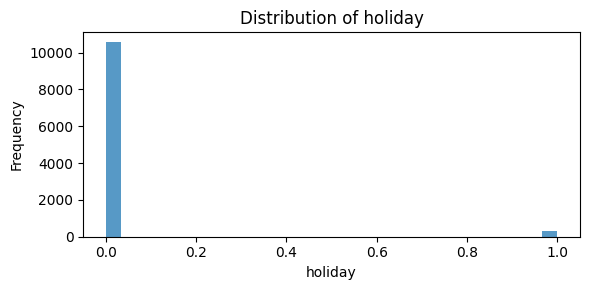

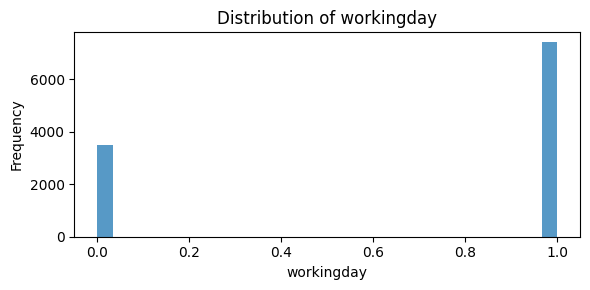

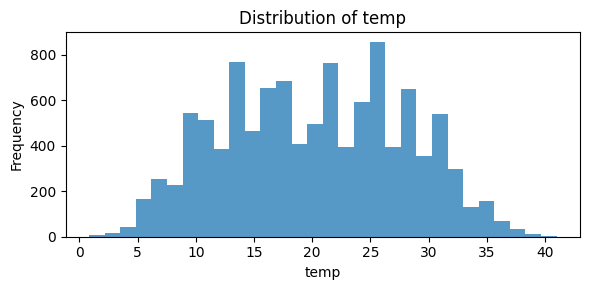

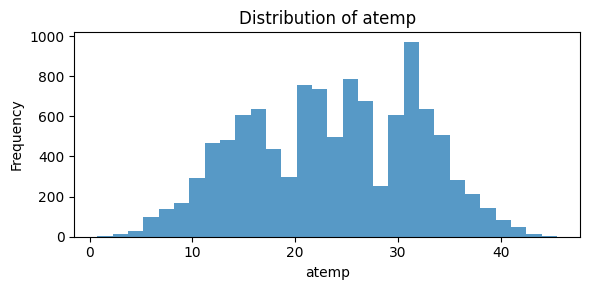

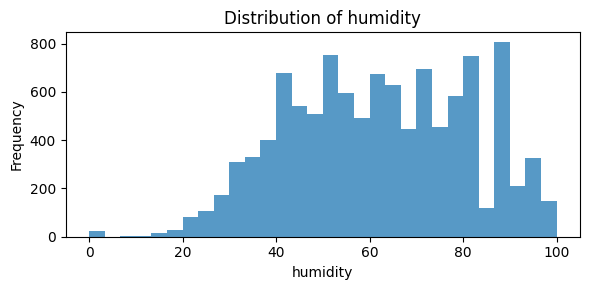

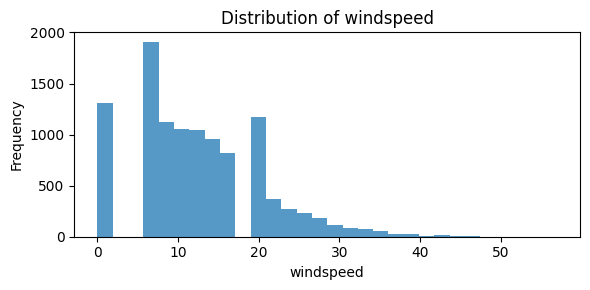

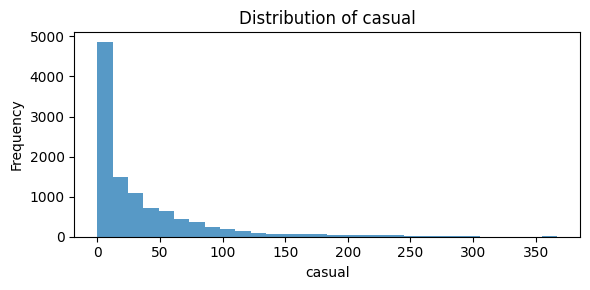

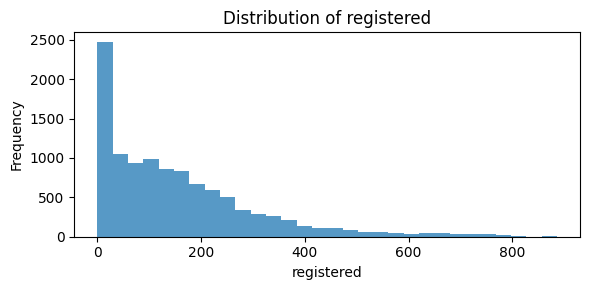

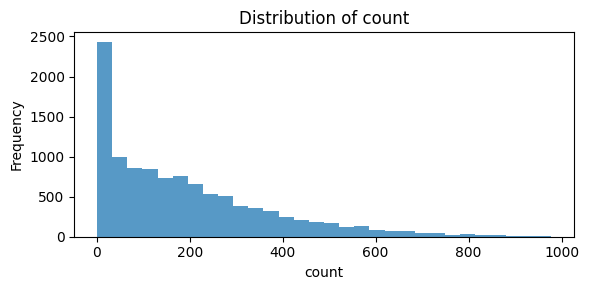

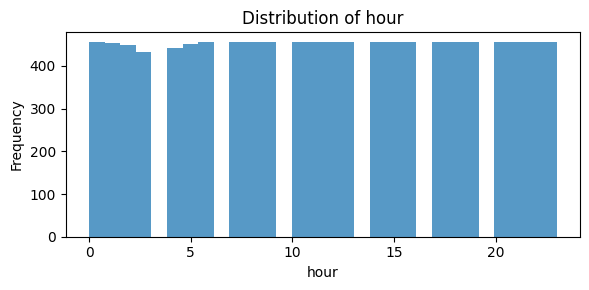

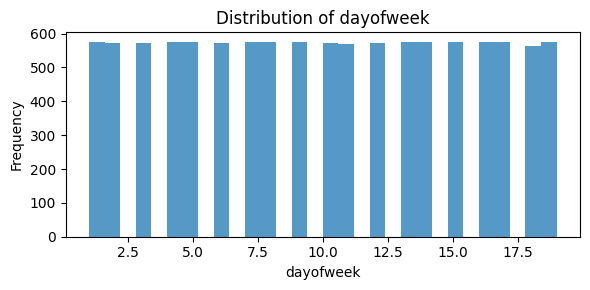

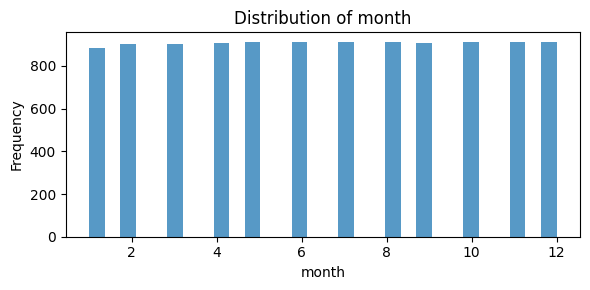

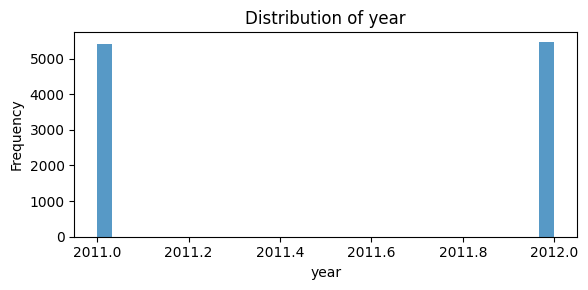

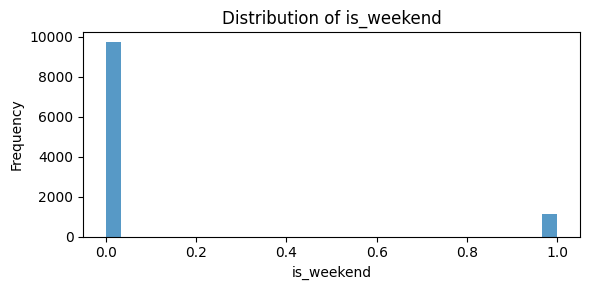

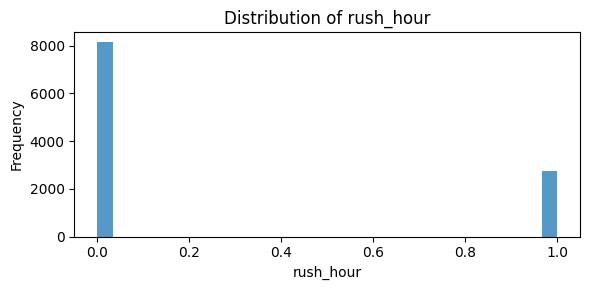

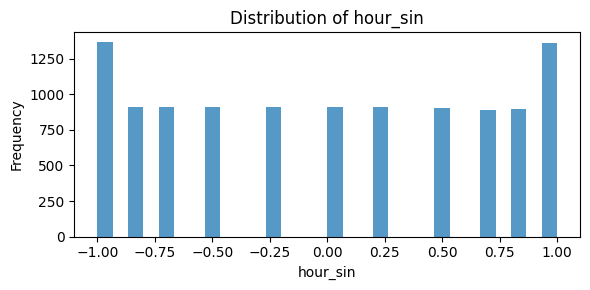

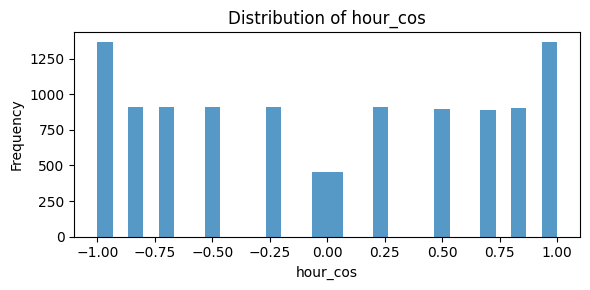

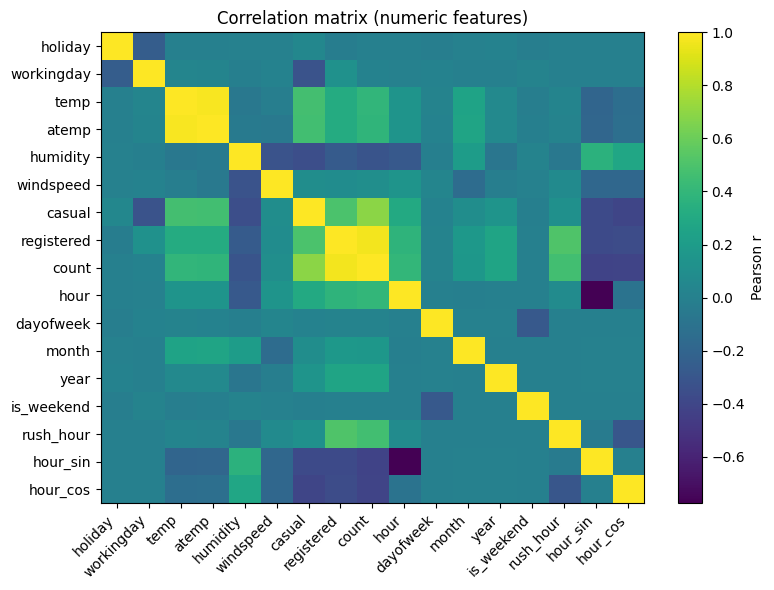

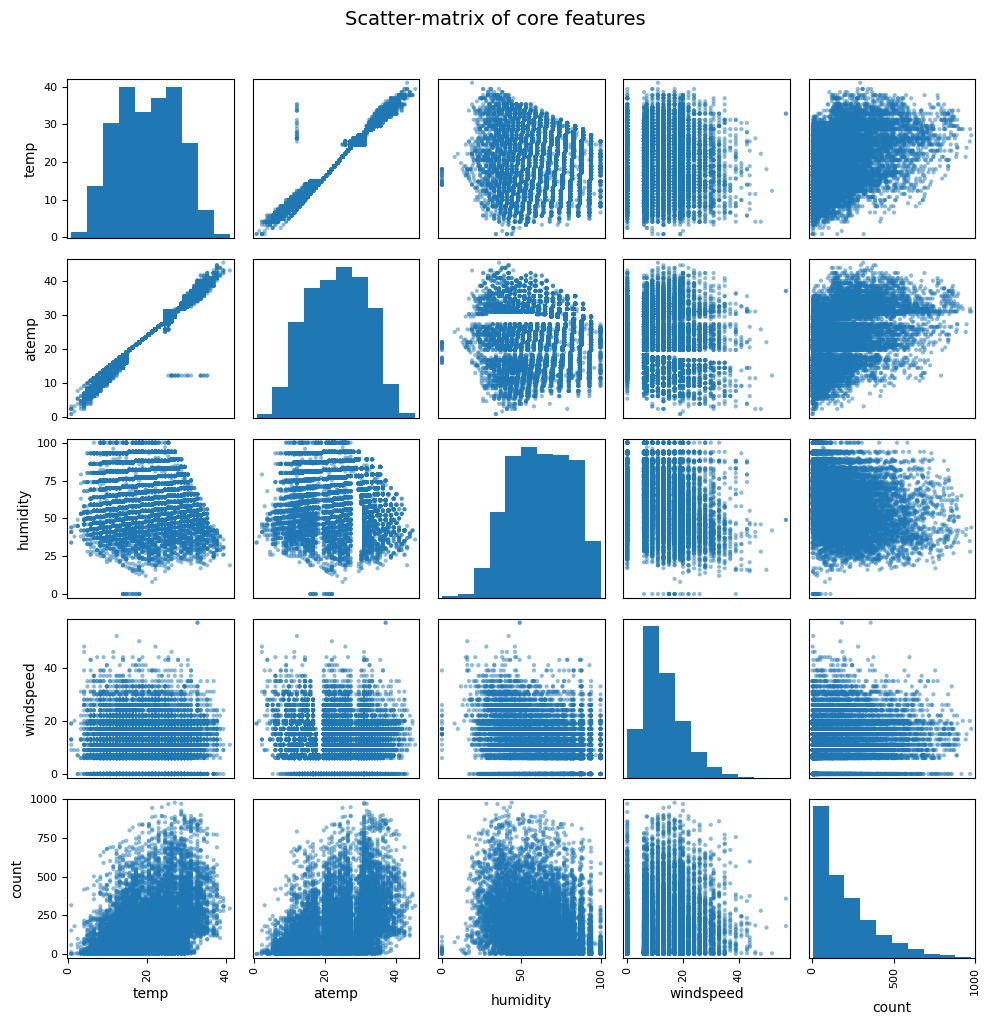

All figures saved to “eda_plots/”.


In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# ── 0.  Set up an output folder ─────────────────────────────────────
out_dir = "eda_plots"
os.makedirs(out_dir, exist_ok=True)

# ── 1.  Numeric columns only ────────────────────────────────────────
numeric_cols = train.select_dtypes(include="number").columns.tolist()

# ── 2.  Histograms (one per feature) ────────────────────────────────
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(6, 3))
    train[col].plot(kind="hist", bins=30, alpha=0.75, ax=ax)
    ax.set(title=f"Distribution of {col}",
           xlabel=col, ylabel="Frequency")
    fig.tight_layout()
    fig.savefig(f"{out_dir}/hist_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)

# ── 3.  Correlation heat-map ────────────────────────────────────────
fig, ax = plt.subplots(figsize=(8, 6))
corr = train[numeric_cols].corr()
im = ax.imshow(corr, cmap="viridis", aspect="auto")
fig.colorbar(im, ax=ax, label="Pearson r")
ax.set_xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
ax.set_yticks(range(len(corr)), corr.columns)
ax.set_title("Correlation matrix (numeric features)")
fig.tight_layout()
fig.savefig(f"{out_dir}/corr_matrix.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

# ── 4.  Scatter-matrix (core features) ──────────────────────────────
key_features = ["temp", "atemp", "humidity", "windspeed", "count"]
axes = scatter_matrix(
    train[key_features],
    figsize=(10, 10),
    diagonal="hist",
)
plt.suptitle("Scatter-matrix of core features", y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig(f"{out_dir}/scatter_matrix.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(plt.gcf())

print(f"All figures saved to “{out_dir}/”.")


In [20]:
# ── Date / time decomposition ───────────────────────────────────────
for df in (train, test):          # run on both splits so columns match
    # Core calendar parts
    df['hour']       = df['datetime'].dt.hour
    df['dayofweek']  = df['datetime'].dt.day   # 0=Mon … 6=Sun
    df['month']      = df['datetime'].dt.month
    df['year']       = df['datetime'].dt.year

    # Weekend flag (Sat/Sun = 1)
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

    # Rush-hour flag (07-09 & 16-18)
    df['rush_hour']  = (
        df['hour'].between(7, 9) | df['hour'].between(16, 18)
    ).astype(int)

    # Optional: cyclical encoding so tree-boosters and nets “feel” the wrap-around
    df['hour_sin']   = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos']   = np.cos(2 * np.pi * df['hour'] / 24)


In [21]:
# Make season and weather categorical in both splits
for col in ["season", "weather"]:
    train[col] = train[col].astype("category")
    test[col]  = test[col].astype("category")


In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,year,is_weekend,rush_hour,hour_sin,hour_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,0,0,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,0,0,0.258819,0.965926
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,0,0,0.500000,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,0,0,0.707107,0.707107
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,0,0,0.866025,0.500000


# Retraining the model with new and modified features 

In [23]:
predictor = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_data,
    time_limit=600,              # 10 minutes
    presets='best_quality'       # focus on best model
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250515_042328"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       29.28 GB / 31.35 GB (93.4%)
Disk Space Avail:   19.43 GB / 19.52 GB (99.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [24]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.023000  root_mean_squared_error      11.894927  323.133456                0.000782           0.063626            3       True         18
1   RandomForestMSE_BAG_L2  -53.309018  root_mean_squared_error      11.062326  287.552717                0.583713          21.073816            2       True         14
2     ExtraTreesMSE_BAG_L2  -54.022056  root_mean_squared_error      11.065089  272.223025                0.586477           5.744124            2       True         16
3   NeuralNetFastAI_BAG_L2  -54.367886  root_mean_squared_error      10.723955  296.251890                0.245342          29.772989            2       True         17
4          LightGBM_BAG_L2  -54.974719  root_mean_squared_error      10.889015  280.123992   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsemb

In [25]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv',
                   parse_dates=['datetime'])

predictions = predictor.predict(test)        # <-- use **predict**, not evaluate


In [26]:
predictions.head()

0    23.230061
1    41.112782
2    45.719391
3    48.530518
4    50.784676
Name: count, dtype: float32

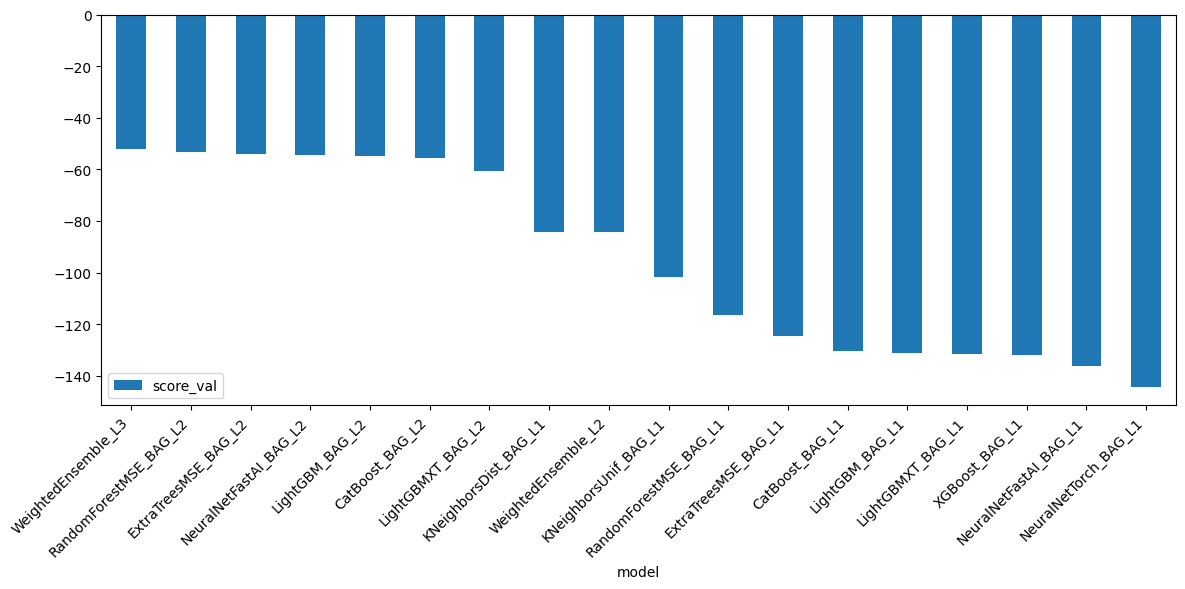

In [27]:
import matplotlib.pyplot as plt

# 1️⃣  Create a larger figure
fig, ax = plt.subplots(figsize=(12, 6))   # wider & taller than default

# 2️⃣  Draw the bar-chart
predictor.leaderboard(silent=True).plot(kind="bar",
                                        x="model",
                                        y="score_val",
                                        ax=ax)

# (optional) rotate long model names so they don’t overlap
plt.xticks(rotation=45, ha='right')

# 3️⃣  Tighten the layout *before* saving
fig.tight_layout()

# 4️⃣  Save without trimming anything
fig.savefig(
    "predictor_leaderboard_feature_engineered.png",
    dpi=300,               # high-res for GitHub
    bbox_inches="tight",   # add margins if needed
    pad_inches=0.1
)


In [28]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

# How many negative values do we have?
(predictions < 0).sum()

# Set them to zero
predictions = predictions.clip(lower=0)


In [29]:
# 1) Build the submission DataFrame
submission = pd.DataFrame({
    "datetime": test["datetime"],   # from the original test.csv
    "count":    predictions         # the Series you just generated
})

# 2) Save it to disk
submission.to_csv("submission_feature_engineered.csv", index=False)

# 3) Quick peek
submission.head()


,datetime,count
0,2011-01-20 00:00:00,23.230061
1,2011-01-20 01:00:00,41.112782
2,2011-01-20 02:00:00,45.719391
3,2011-01-20 03:00:00,48.530518
4,2011-01-20 04:00:00,50.784676


# Final Submissions to kaggle
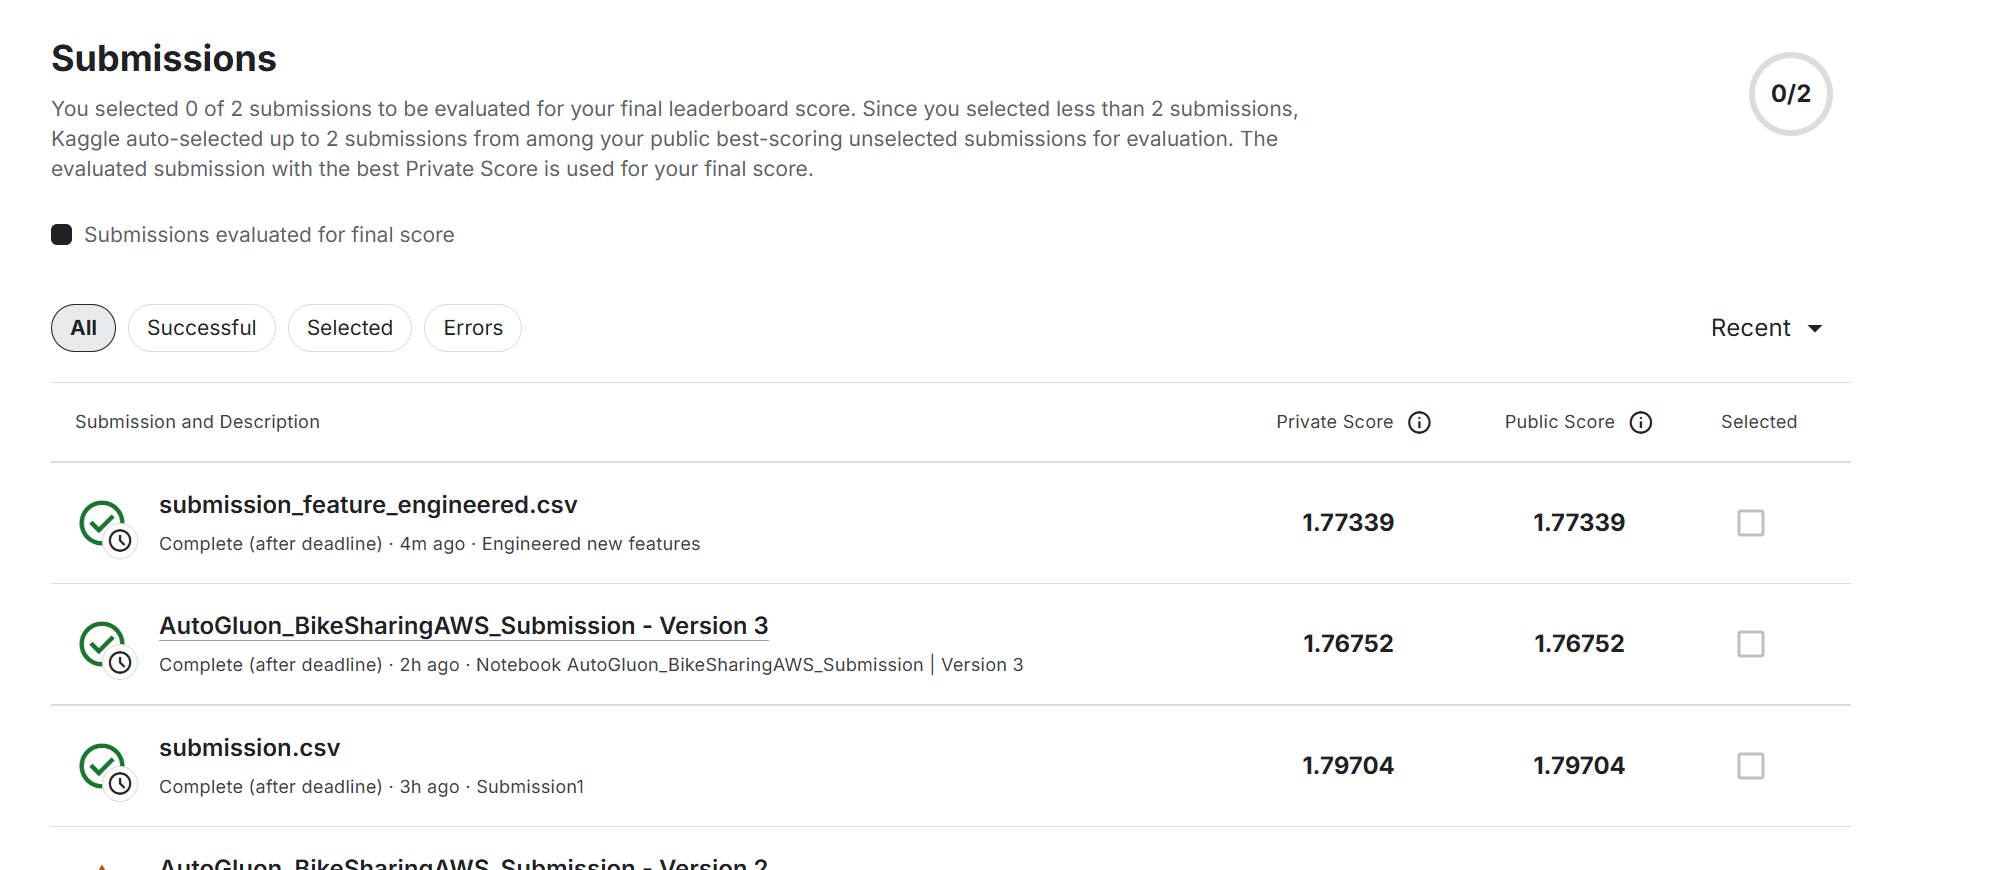